In [18]:
# -*- coding: utf-8 -*-
# 首先导入我们需要的包，fbprophet没多少包依赖，pandas是为了读入数据的，pyplot是用来绘图的，fbprophet也支持直接绘图
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet


In [19]:
data = pd.read_csv('data.csv')
data = data.sort_values(by=['date'])
data = data.reset_index()

In [20]:
# 对数据做格式转化，prophet所需要的只有两列，分别是ds和y，这里我分别预测未来一个月的最小值和最大值。
dfmin = pd.DataFrame()
dfmin['ds'] = data['date']
dfmin['y'] = data['minT']
dfmax = pd.DataFrame()
dfmax['ds'] = data['date']
dfmax['y'] = data['maxT']
dfmax.head(10)

,ds,y
0,2011-01-01,0
1,2011-01-02,-2
2,2011-01-03,1
3,2011-01-04,-1
4,2011-01-05,-1
5,2011-01-06,0
6,2011-01-07,1
7,2011-01-08,1
8,2011-01-09,-1
9,2011-01-10,-1


In [30]:
minModel = Prophet()
minModel.fit(dfmin)
maxModel = Prophet()
maxModel.fit(dfmax)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
futuremin = minModel.make_future_dataframe(periods=30)
futuremax = maxModel.make_future_dataframe(periods=30)
futuremin.tail()

,ds
3609,2020-11-18
3610,2020-11-19
3611,2020-11-20
3612,2020-11-21
3613,2020-11-22


In [23]:
fcmin = minModel.predict(futuremin)
fcmax = maxModel.predict(futuremax)
fcmin[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# 这几个数据分别是预测日期，预测结果值，预测结果上下界。

,ds,yhat,yhat_lower,yhat_upper
3609,2020-11-18,-1.093796,-4.028920,2.032686
3610,2020-11-19,-1.506482,-4.483322,1.518436
3611,2020-11-20,-1.696010,-4.731187,1.240592
3612,2020-11-21,-1.945344,-4.807169,1.123026
3613,2020-11-22,-2.424419,-5.462928,0.657274


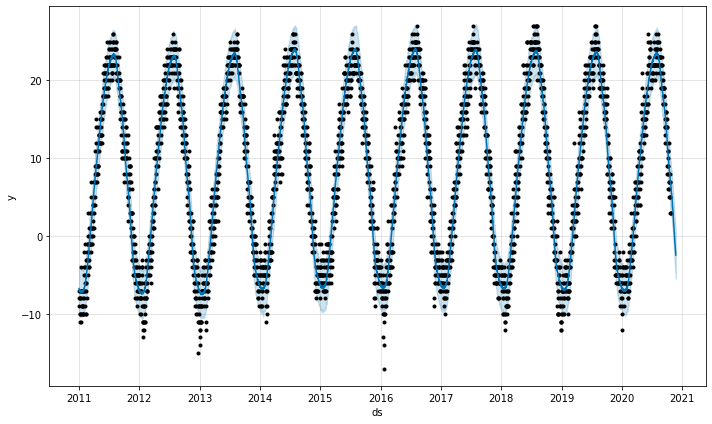

In [24]:
fig0 = minModel.plot(fcmin)

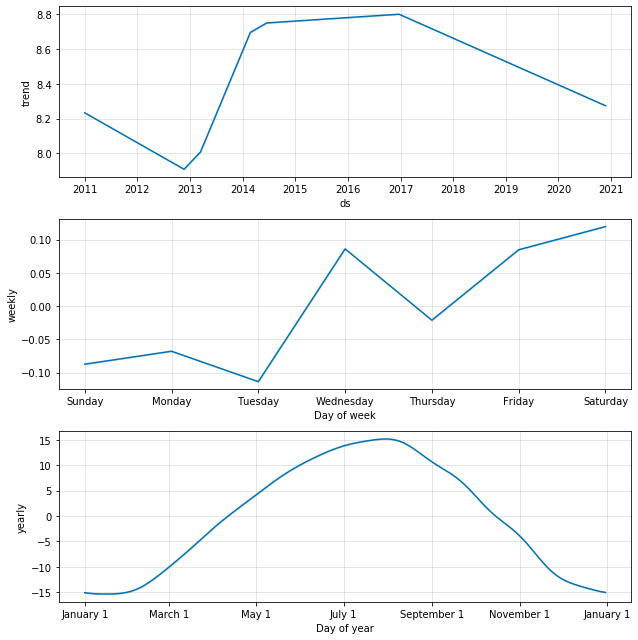

In [25]:
fig3 = minModel.plot_components(fcmin)

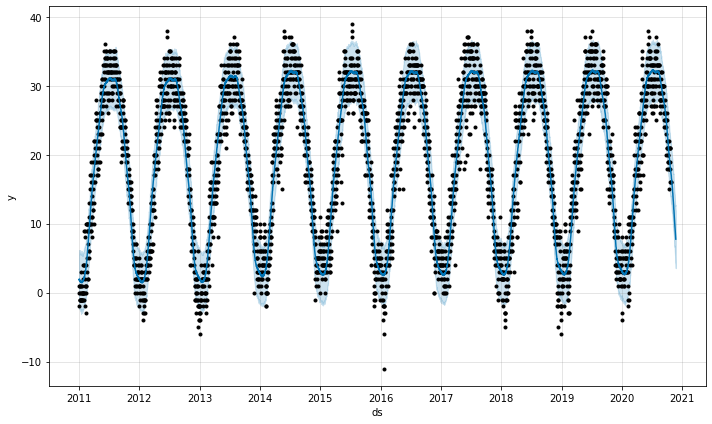

In [26]:
fig1 = maxModel.plot(fcmax)

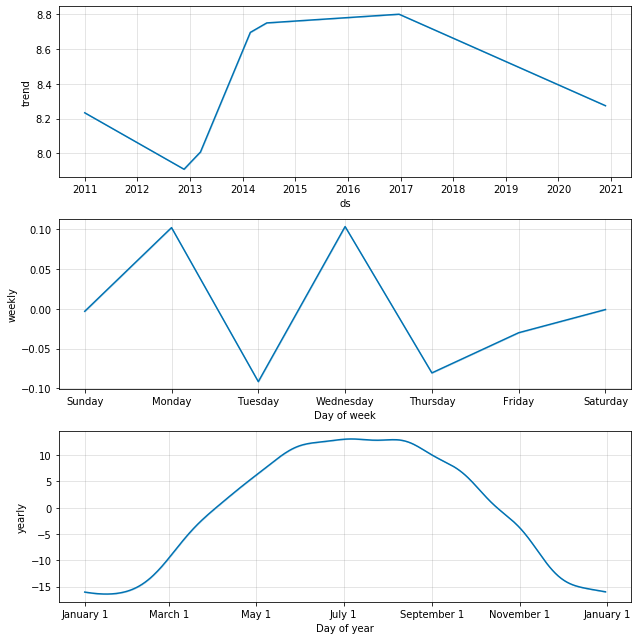

In [27]:
fig2 = maxModel.plot_components(fcmin)

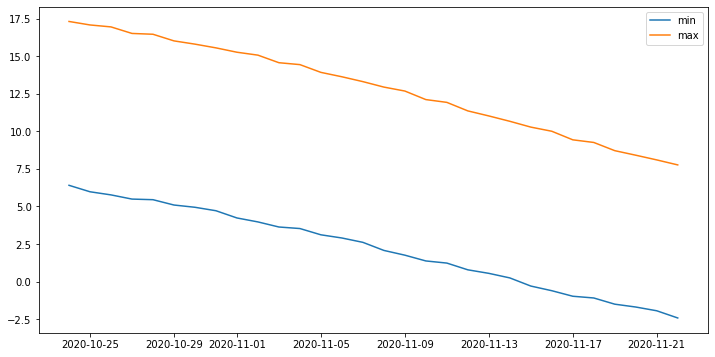

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(fcmin['ds'].tail(30), fcmin['yhat'].tail(30), label='min')
plt.plot(fcmax['ds'].tail(30), fcmax['yhat'].tail(30), label='max')
plt.legend()
plt.show()